## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing our data set

In [2]:
dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:2].values # x should always be a matrix try to change it to [:,1] you will see the differnece
y=dataset.iloc[:,2].values
display(pd.DataFrame(dataset))
display(pd.DataFrame(X))
display(pd.DataFrame(y))

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


,0
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


## Splitting the dataset into the Training set and Test set

In [3]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

## Feature Scalling 

In [4]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y=StandardScaler()
# you can scale your dummy variables or not based on the context and what you want to do
# with your data if you scalled it you will lose the knoweldge of the encding 
# but you may get better accuracy if you don't they will be already scaled for this model
# we will scale them
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train=np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_test=np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))
"""

"from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nsc_y=StandardScaler()\n# you can scale your dummy variables or not based on the context and what you want to do\n# with your data if you scalled it you will lose the knoweldge of the encding \n# but you may get better accuracy if you don't they will be already scaled for this model\n# we will scale them\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\ny_train=np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))\ny_test=np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))\n"

## Fitting decision tree regression to the dataset

In [5]:
# create your regressor
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

## Predicting a new result with the regression

In [6]:
y_pred=regressor.predict([[6.5]])
display(pd.DataFrame(y_pred))

,0
0,150000.0


## Visualizing the regression

In [7]:
# in decision tree it's non linear non continious model so the plot is not right 
"""plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Truth or bluff (model Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
"""

"plt.scatter(X,y,color='red')\nplt.plot(X,regressor.predict(X),color='blue')\nplt.title('Truth or bluff (model Regression)')\nplt.xlabel('Position level')\nplt.ylabel('Salary')\nplt.show()\n"

## Visualizing the regression with higher resolution and smoother curve

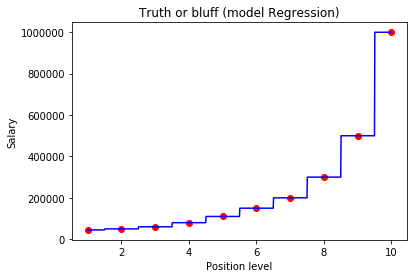

In [8]:
X_grid=np.arange(min(X),max(X),0.01) # increment by 0.01 to get better curve
X_grid=X_grid.reshape((len(X_grid)),1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Truth or bluff (model Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()